# Series temporales - Vuelos

## Librerías 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt   # para graficos de ACF y PACF
import statsmodels.tsa.stattools as sts      # para test de D-F (estacionariedad)
from statsmodels.tsa.seasonal import seasonal_decompose  #para analizar estacionalidad
from statsmodels.tsa.arima_model import ARMA #arma
from statsmodels.tsa.arima_model import ARIMA #arIma
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Dataset y preprocesado

In [3]:
data = pd.read_excel('vuelos_2005-2007.xlsx')
df = data.copy()

In [4]:
df.head()

,fecha,vuelos
0,2005-01-01,594924
1,2005-02-01,545332
2,2005-03-01,617540
3,2005-04-01,594492
4,2005-05-01,614802


In [5]:
df.fecha = pd.to_datetime(df.fecha)
df.set_index("fecha", inplace=True)
df.head()

,vuelos
fecha,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802


In [6]:
df.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01', '2005-11-01', '2005-12-01',
               '2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01', '2006-11-01', '2006-12-01',
               '2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
               '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01'],
              dtype='datetime64[ns]', name='fecha', freq=None)

In [7]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01', '2005-11-01', '2005-12-01',
               '2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01', '2006-11-01', '2006-12-01',
               '2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
               '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01'],
              dtype='datetime64[ns]', name='fecha', freq='MS')

In [8]:
df.describe()

,vuelos
count,36.000000
mean,603770.361111
std,27397.670751
min,531247.000000
25%,585985.500000
50%,605183.000000
75%,623159.500000
max,653279.000000


In [9]:
df.isna().sum()

vuelos    0
dtype: int64

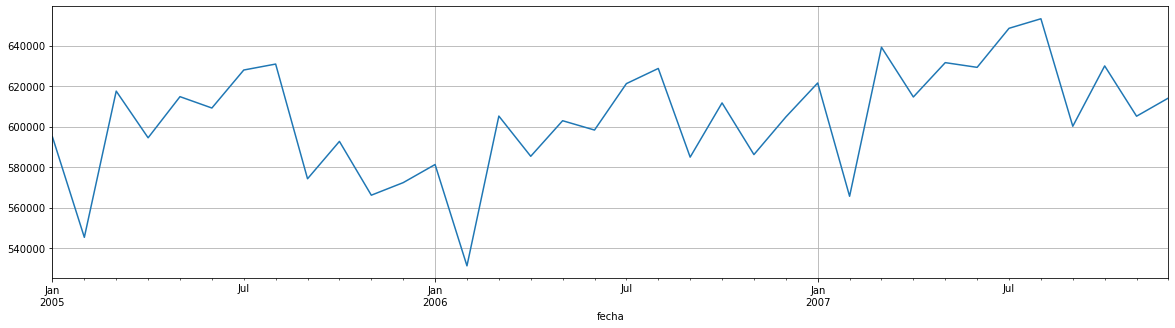

In [10]:
df.vuelos.plot(figsize=(20,5))
plt.grid()
plt.show()

    Al parecer hay una pequeña estacionalidad anual

### Datos de entrenamiento y prueba

In [11]:
df_train = df.iloc[:24]
df_test = df.iloc[24:]
print(len(df),len(df_train),len(df_test))

36 24 12


In [12]:
df_train.tail()

,vuelos
fecha,
2006-08-01,628732
2006-09-01,584937
2006-10-01,611718
2006-11-01,586197
2006-12-01,604758


In [13]:
df_test.head()

,vuelos
fecha,
2007-01-01,621559
2007-02-01,565604
2007-03-01,639209
2007-04-01,614648
2007-05-01,631609


## Análisis datos entrenamiento

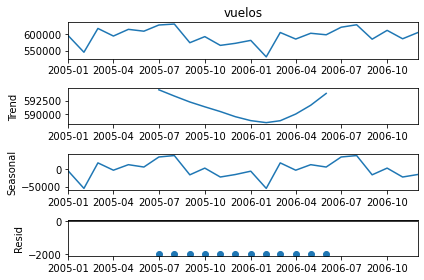

In [14]:
sd = seasonal_decompose(df_train.vuelos, model='add')
sd.plot()
plt.show()

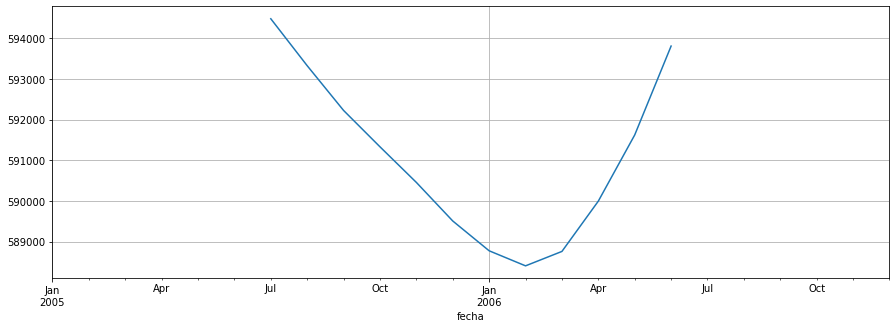

In [15]:
sd.trend.plot(figsize=(15,5))
plt.grid()
plt.show()
#raro

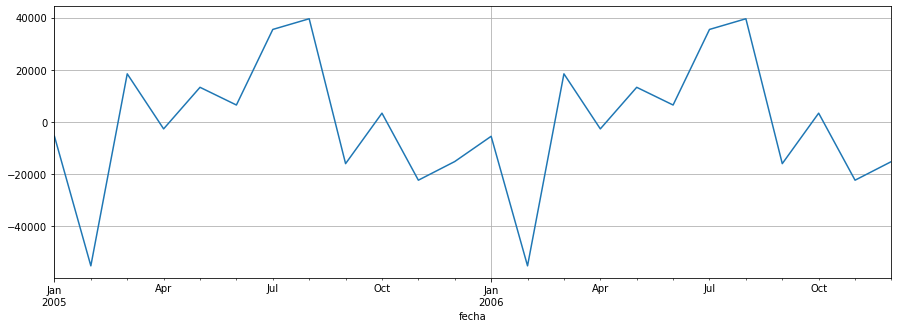

In [16]:
sd.seasonal.plot(figsize=(15,5))
plt.grid()
plt.show()
#tendencia anual

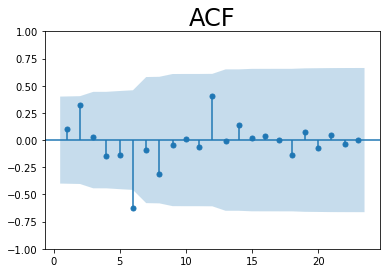

In [17]:
#La función de autocorrelación (ACF)
#Mide la correlación entre dos variables separadas por k periodos.
#Mide el grado de asociación lineal que existe entre dos variables del mismo proceso estocástico.
sgt.plot_acf(df_train.vuelos, lags = 23, zero = False)
plt.title("ACF", size = 24)
plt.show()

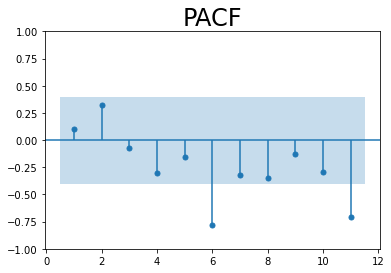

In [18]:
sgt.plot_pacf(df_train.vuelos, lags = 11, zero = False, method = ('ols'))
plt.title("PACF", size = 24)
plt.show()

In [19]:
sts.adfuller(df.vuelos) #no es estacionaria

(-0.6931377363114982,
 0.8485190206514908,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 569.1448398218178)

In [20]:
sts.adfuller(df_train.vuelos)

(-3.4473430977839925,
 0.009447009625234787,
 7,
 16,
 {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625},
 314.3335945608688)

### Auto ARIMA

In [21]:
!pip install pmdarima

In [22]:
from pmdarima.arima import auto_arima

In [23]:
from pmdarima.arima import ndiffs
from pmdarima.arima import nsdiffs
print(ndiffs(df.vuelos))       #diferenciacion NO estacional (d) necesaria para que la variable sea estacionaria
print(nsdiffs(df.vuelos,12))   #diferenciacion estacional (D) necesaria para que la variable sea estacionaria (es necesario colocar el período)
#estaria bueno usar algo de este estilo SARIMA(p,d=0,q)(P,D=1,Q,s)

0
1


https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [24]:
model_auto = auto_arima(df_train.vuelos)

In [25]:
model_auto

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

In [26]:
print(model_auto.summary())   #ARMA(2,2) no aparecen los cuatro parammetros estacionales

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -272.794
Date:                Tue, 25 Oct 2022   AIC                            557.587
Time:                        13:29:19   BIC                            564.656
Sample:                    01-01-2005   HQIC                           559.462
                         - 12-01-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.875e+05    1.6e-06   2.41e+11      0.000    3.88e+05    3.88e+05
ar.L1          0.6899      0.426      1.620      0.105      -0.145       1.525
ar.L2         -0.3416      0.425     -0.804      0.4

### Validación

In [27]:
start=len(df_train)
end=len(df_train)+len(df_test)
pred = model_auto.predict(start=start, end=end)

In [28]:
pred

2007-01-01    586924.944720
2007-02-01    599013.208689
2007-03-01    600302.106936
2007-04-01    597061.880639
2007-05-01    594386.182837
2007-06-01    593647.124834
2007-07-01    594051.290357
2007-08-01    594582.587183
2007-09-01    594811.058534
2007-10-01    594787.184548
Freq: MS, dtype: float64

In [29]:
pred = pd.DataFrame(model_auto.predict(n_periods = len(df_test), index = df_test.index))   
pred

,0
2007-01-01,586924.944720
2007-02-01,599013.208689
2007-03-01,600302.106936
2007-04-01,597061.880639
2007-05-01,594386.182837
2007-06-01,593647.124834
2007-07-01,594051.290357
2007-08-01,594582.587183
2007-09-01,594811.058534
2007-10-01,594787.184548


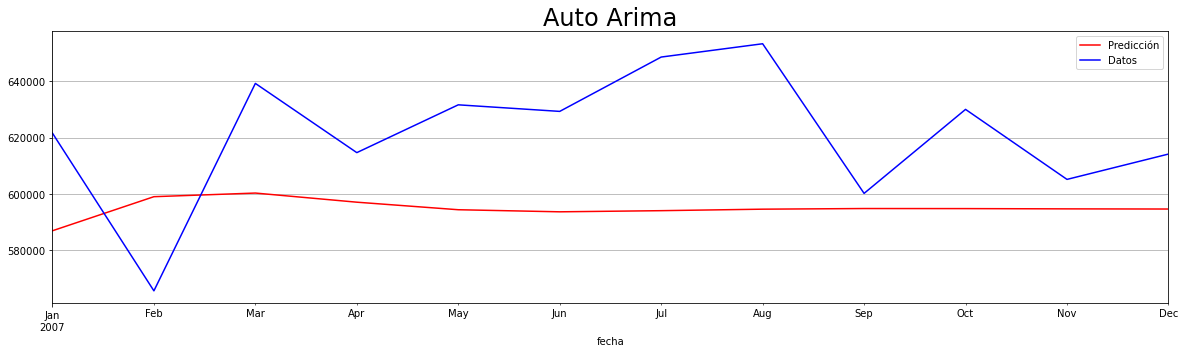

In [30]:
pred.plot(figsize = (20,5), color = "red")
df_test.vuelos.plot(color = "blue")
plt.title("Auto Arima", size = 24)
plt.legend(['Predicción','Datos'])
plt.grid()
plt.show()

## Configurando Auto Arima

 m -> frecuencia estacional 
 
 max_order -> max=(p+q) numero total de variables no estacionales
 
 max_p -> maximo numero de componentes AR
 
 max_q -> maximo numero de componentes MA en este caso, evalua los modelos entre (11) y (77))
 max_d -> maximo numero de integraciones

alpha -> nivel de significación, el valor predeterminado es 5%, que deberíamos usar la mayor parte del tiempo

information_criterion -> 'aic', 'aicc', 'bic', 'hqic', 'oob' 
 (Akaike Information Criterion, Corrected Akaike Information Criterion,
 Bayesian Information Criterion, Hannan-Quinn Information Criterion, or
 "out of bag"--validación con datos de testeo)
 out_of_smaple_size -> valida la selección del modelo (pasa el conjunto de datos completo y establece 20% para que sea out_of_sample_size)
 Por defecto, viene aic

In [31]:
model_auto1 = auto_arima(df_train.vuelos, start_p=1,start_q=1, max_p=12,max_q=12, max_order=None,start_P=1,start_Q=0,m=12,d=0,D=1)

In [32]:
print(model_auto1.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   24
Model:             SARIMAX(3, 0, 2)x(0, 1, [], 12)   Log Likelihood                   0.000
Date:                             Tue, 25 Oct 2022   AIC                             14.000
Time:                                     13:29:28   BIC                             17.394
Sample:                                 01-01-2005   HQIC                            12.743
                                      - 12-01-2006                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.387e+04         -0        inf      0.000   -1.39e+04   -1.39e+04
ar.L1              -0      

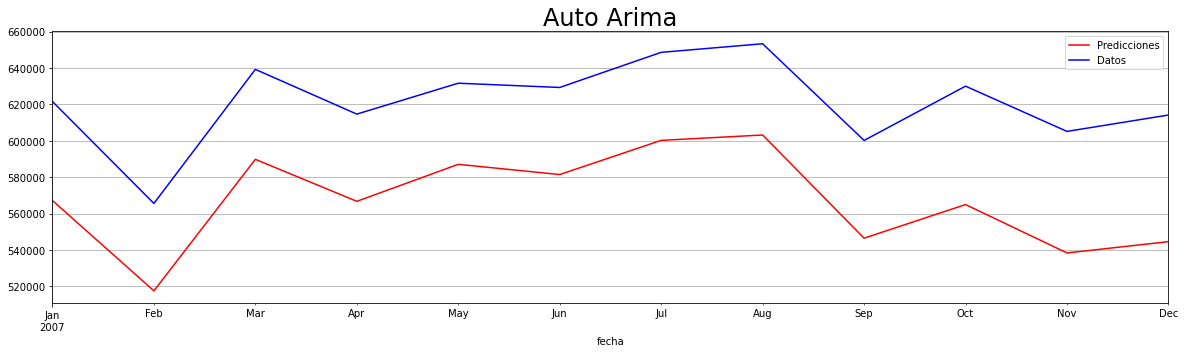

In [33]:
pred1 = pd.DataFrame(model_auto1.predict(n_periods = len(df_test)), index = df_test.index)
pred1.plot(figsize = (20,5), color = "red")
df_test.vuelos.plot(color = "blue")
plt.title("Auto Arima", size = 24)
plt.legend(['Predicciones','Datos'])
plt.grid()
plt.show()

In [34]:
int(len(df)*(1/3)) # test

12

In [35]:
model_auto2 = auto_arima(df.vuelos, start_p=1,start_q=1, max_p=12,max_q=12, max_order=None,start_P=1,start_Q=0,m=12,d=0,D=1,
                      information_criterion = 'oob', out_of_sample_size = int(len(df)*(1/3)))

In [36]:
print(model_auto2.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   36
Model:             SARIMAX(0, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -268.604
Date:                              Tue, 25 Oct 2022   AIC                            547.208
Time:                                      13:29:34   BIC                            553.098
Sample:                                           0   HQIC                           548.771
                                               - 36                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.144e+04   2284.320      5.010      0.000    6966.999    1.59e+04
ma.L1          0.01

In [37]:
pred2 = pd.DataFrame(model_auto2.predict(n_periods = len(df_test)), index = df_test.index)

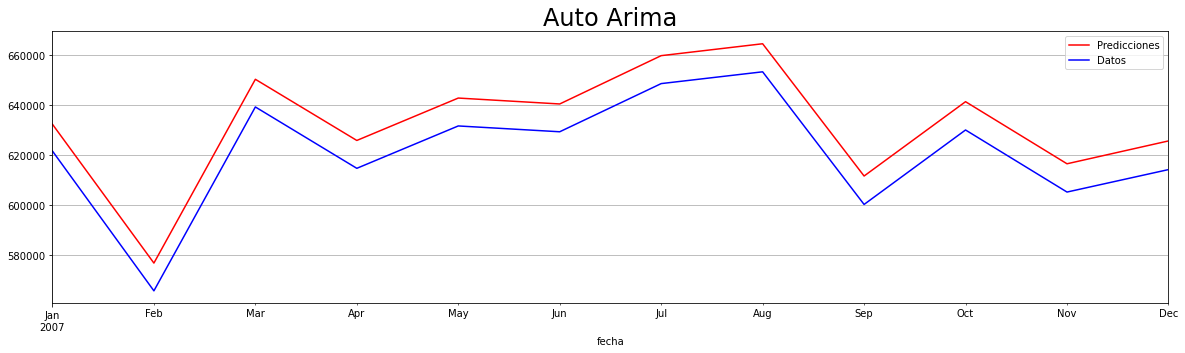

In [38]:
pred2.plot(figsize = (20,5), color = "red")
df_test.vuelos.plot(figsize = (20,5),color = "blue")
plt.title("Auto Arima", size = 24)
plt.legend(['Predicciones','Datos'])
plt.grid()
plt.show()

### Comparación numérica

In [39]:
labels = ['AU_A(1)','AU_AR(2)']
preds = [pred1, pred2] 

for i in range(2):
    error = np.sqrt(mean_squared_error(df_test, preds[i]))
    print(f'{labels[i]} Error: {error}')

AU_A(1) Error: 54395.87746264397
AU_AR(2) Error: 11190.402736627031


### Predicciones

In [40]:
fcast,error = model_auto2.predict(n_periods = 12,  return_conf_int= True)

In [41]:
error

array([[609795.39275651, 654775.20915054],
       [554225.44727838, 599210.60709158],
       [627783.87934682, 672787.69906223],
       [603299.40205552, 648303.22177093],
       [620271.04690321, 665274.86661862],
       [617904.35180144, 662908.17151685],
       [637243.20585656, 682247.02557198],
       [642006.54107226, 687010.36078767],
       [589064.34352337, 634068.16323878],
       [618817.2298529 , 663821.04956831],
       [593962.90238363, 638966.72209904],
       [603107.07199725, 648110.89171266]])

In [42]:
fcast

array([632285.30095352, 576718.02718498, 650285.78920452, 625801.31191322,
       642772.95676092, 640406.26165914, 659745.11571427, 664508.45092996,
       611566.25338108, 641319.1397106 , 616464.81224134, 625608.98185495])

In [43]:
fecha_fut=pd.date_range(start="2008-01-01",freq='MS',periods=12)
fecha_fut

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [44]:
df_fcast = pd.DataFrame(fcast)
error = pd.DataFrame(error)

In [45]:
df_fcast.index= fecha_fut
df_fcast.columns=['fcast']
df_fcast.head()

,fcast
2008-01-01,632285.300954
2008-02-01,576718.027185
2008-03-01,650285.789205
2008-04-01,625801.311913
2008-05-01,642772.956761


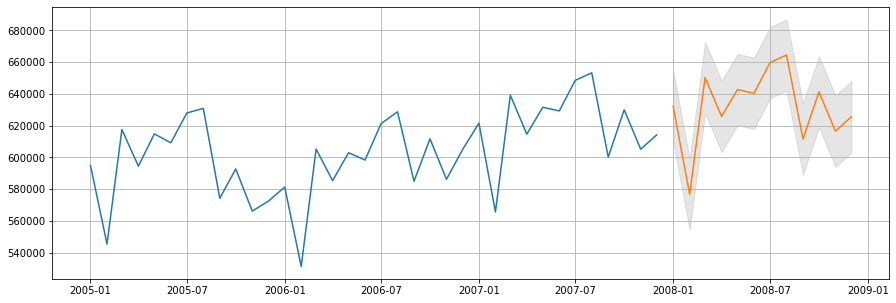

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df.vuelos)
ax.plot(df_fcast)
ax.fill_between(df_fcast.index, 
                error[0], 
                error[1], color='grey', alpha=0.2)
plt.grid()
plt.show()

### Actividad: 

Análisis completo de dataset 'tasas.xlsx'. Estudiar la variable 'Value'

Ayuda: https://www.alldatascience.com/time-series/forecasting-time-series-with-auto-arima/

In [47]:
data2 = pd.read_excel('tasas.xlsx', parse_dates=['TIME'], index_col='TIME')
df2 = data2.copy()

In [48]:
df2.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
TIME,,,,,,,
2000-01-01,EU27_2020,HUR,TOT,PC_LF,M,9.2,NaN
2000-02-01,EU27_2020,HUR,TOT,PC_LF,M,9.2,NaN
2000-03-01,EU27_2020,HUR,TOT,PC_LF,M,9.2,NaN
2000-04-01,EU27_2020,HUR,TOT,PC_LF,M,9.1,NaN
2000-05-01,EU27_2020,HUR,TOT,PC_LF,M,9.1,NaN


In [49]:
df2.drop(['LOCATION','INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1,inplace=True)

In [50]:
df2.head()

,Value
TIME,
2000-01-01,9.2
2000-02-01,9.2
2000-03-01,9.2
2000-04-01,9.1
2000-05-01,9.1


In [51]:
df2.tail() # del 2000/01/01 al 2021/07/01

,Value
TIME,
2021-03-01,7.5
2021-04-01,7.5
2021-05-01,7.3
2021-06-01,7.1
2021-07-01,6.9


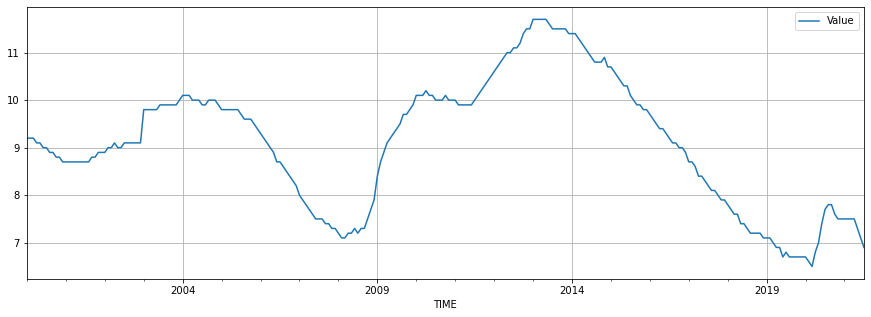

In [52]:
df2.plot(figsize=(15,5))
plt.grid()
plt.show()

In [53]:
df2.describe()

,Value
count,259.000000
mean,9.108494
std,1.357182
min,6.500000
25%,7.900000
50%,9.100000
75%,10.000000
max,11.700000


In [54]:
df2.isna().sum()

Value    0
dtype: int64

In [55]:
df2.shape

(259, 1)

In [56]:
df3 = df2.iloc[:252] #me quedo con 21 años completos
df3

,Value
TIME,
2000-01-01,9.2
2000-02-01,9.2
2000-03-01,9.2
2000-04-01,9.1
2000-05-01,9.1
...,...
2020-08-01,7.8
2020-09-01,7.8
2020-10-01,7.6


In [57]:
df3.index.freq ='MS'

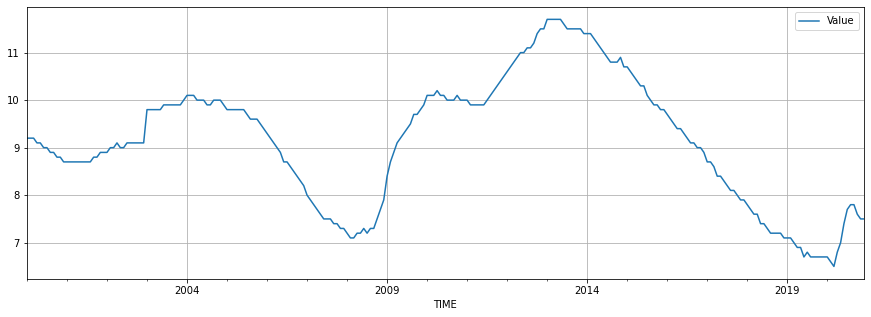

In [58]:
df3.plot(figsize=(15,5))
plt.grid()
plt.show()

### Datos de entrenamiento y prueba

In [59]:
df_train = df3.iloc[:204]
df_test = df3.iloc[204:]
print(len(df3),len(df_train),len(df_test))

252 204 48


In [60]:
df_train.tail()

,Value
TIME,
2016-08-01,9.1
2016-09-01,9.1
2016-10-01,9.0
2016-11-01,9.0
2016-12-01,8.9


In [61]:
df_test.head()

,Value
TIME,
2017-01-01,8.7
2017-02-01,8.7
2017-03-01,8.6
2017-04-01,8.4
2017-05-01,8.4


In [62]:
df_test.tail()

,Value
TIME,
2020-08-01,7.8
2020-09-01,7.8
2020-10-01,7.6
2020-11-01,7.5
2020-12-01,7.5


## Análisis datos entrenamiento

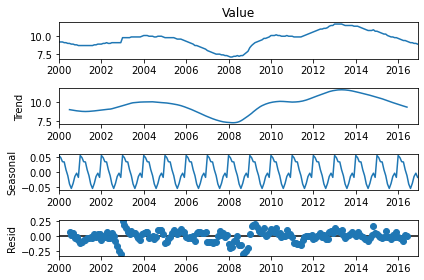

In [63]:
sd = seasonal_decompose(df_train.Value, model='add')
sd.plot()
plt.show()

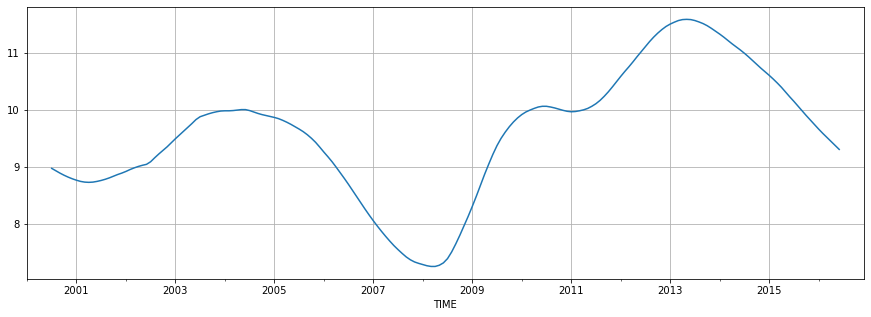

In [64]:
sd.trend.plot(figsize=(15,5))
plt.grid()
plt.show()
#raro

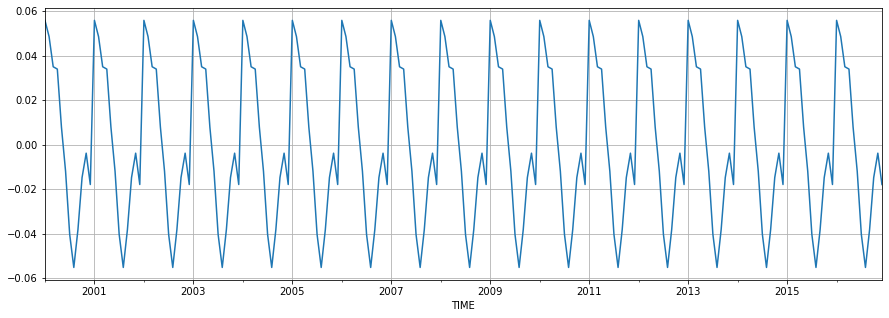

In [65]:
sd.seasonal.plot(figsize=(15,5))
plt.grid()
plt.show()
#tendencia anual

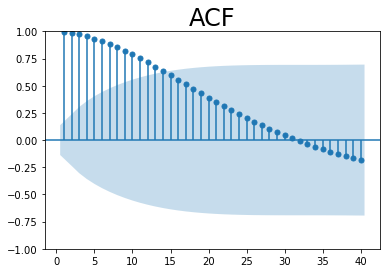

In [66]:
sgt.plot_acf(df_train.Value, lags = 40, zero = False)
plt.title("ACF", size = 24)
plt.show()

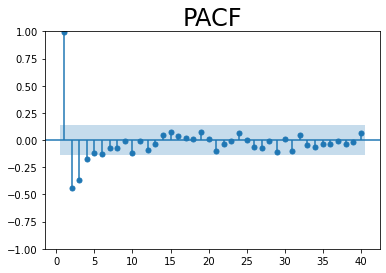

In [67]:
sgt.plot_pacf(df_train.Value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF", size = 24)
plt.show()

In [68]:
sts.adfuller(df3.Value) # NO es estacionaria

(-2.63879277216797,
 0.08524167025262402,
 9,
 242,
 {'1%': -3.457664132155201,
  '5%': -2.8735585105960224,
  '10%': -2.5731749894132916},
 -428.38690653929825)

In [69]:
sts.adfuller(df_train.Value) # NO es estacionaria

(-2.272262511769057,
 0.18106994999089665,
 5,
 198,
 {'1%': -3.4638151713286316,
  '5%': -2.876250632135043,
  '10%': -2.574611347821651},
 -361.6769947384174)

# AUTO ARIMA

In [70]:
from pmdarima.arima import ndiffs
from pmdarima.arima import nsdiffs
print(ndiffs(df3.Value))       #diferenciacion NO estacional (d) necesaria para que la variable sea estacionaria
print(nsdiffs(df3.Value,12))   #diferenciacion estacional (D) necesaria para que la variable sea estacionaria (es necesario colocar el período)
#estaria bueno usar algo de este estilo SARIMA(p,d=0,q)(P,D=1,Q,s)

1
0


In [71]:
print(ndiffs(df_train.Value))       #diferenciacion NO estacional (d) necesaria para que la variable sea estacionaria
print(nsdiffs(df_train.Value,12))

1
0


https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [72]:
model_auto = auto_arima(df_train.Value)

In [73]:
model_auto

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [74]:
print(model_auto.summary())   #ARIMA(1,1,1)  # TODOS SON SIGNIFICATIVOS

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  204
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 204.217
Date:                Tue, 25 Oct 2022   AIC                           -402.434
Time:                        13:29:39   BIC                           -392.494
Sample:                    01-01-2000   HQIC                          -398.412
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9309      0.048     19.597      0.000       0.838       1.024
ma.L1         -0.6855      0.071     -9.647      0.000      -0.825      -0.546
sigma2         0.0078      0.000     31.725      0.0

### Validación

In [75]:
start=len(df_train)
end=len(df_train)+len(df_test)
pred = model_auto.predict(start=start, end=end)

In [76]:
pred

2017-01-01    8.848819
2017-02-01    8.801172
2017-03-01    8.756816
2017-04-01    8.715522
2017-05-01    8.677080
2017-06-01    8.641292
2017-07-01    8.607975
2017-08-01    8.576959
2017-09-01    8.548085
2017-10-01    8.521204
Freq: MS, dtype: float64

In [77]:
pred = pd.DataFrame(model_auto.predict(n_periods = len(df_test), index = df_test.index))   
pred

,0
2017-01-01,8.848819
2017-02-01,8.801172
2017-03-01,8.756816
2017-04-01,8.715522
2017-05-01,8.677080
2017-06-01,8.641292
2017-07-01,8.607975
2017-08-01,8.576959
2017-09-01,8.548085
2017-10-01,8.521204


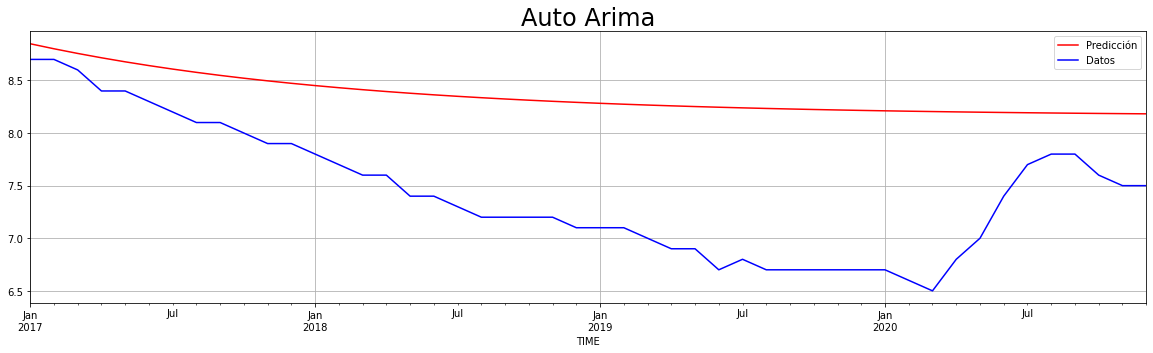

In [78]:
pred.plot(figsize = (20,5), color = "red")
df_test.Value.plot(color = "blue")
plt.title("Auto Arima", size = 24)
plt.legend(['Predicción','Datos'])
plt.grid()
plt.show()

# Configuración AUTO ARIMA

In [79]:
model_auto1 = auto_arima(df_train.Value, start_p=1,start_q=1, max_p=20,max_q=20, max_order=None,start_P=1,start_Q=0,m=12,d=1,D=0)

In [80]:
print(model_auto1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  204
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 204.217
Date:                Tue, 25 Oct 2022   AIC                           -402.434
Time:                        13:29:45   BIC                           -392.494
Sample:                    01-01-2000   HQIC                          -398.412
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9309      0.048     19.597      0.000       0.838       1.024
ma.L1         -0.6855      0.071     -9.647      0.000      -0.825      -0.546
sigma2         0.0078      0.000     31.725      0.0

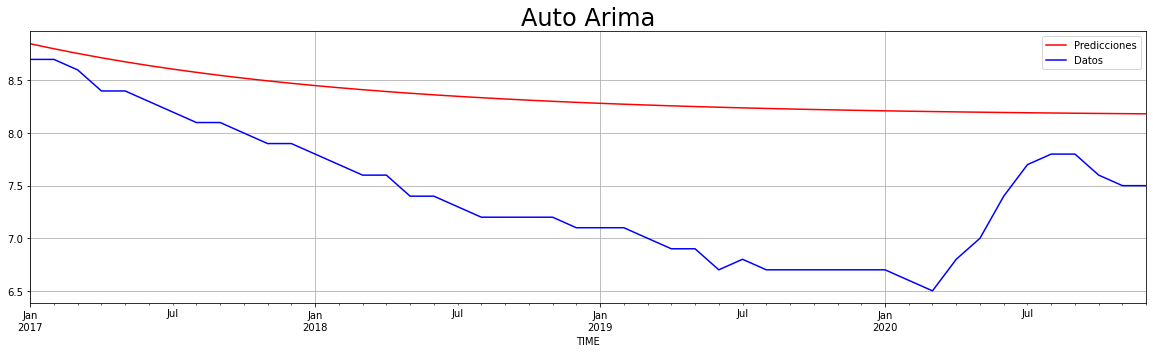

In [81]:
pred1 = pd.DataFrame(model_auto1.predict(n_periods = len(df_test)), index = df_test.index)
pred1.plot(figsize = (20,5), color = "red")
df_test.Value.plot(color = "blue")
plt.title("Auto Arima", size = 24)
plt.legend(['Predicciones','Datos'])
plt.grid()
plt.show()

In [82]:
int(len(df3)*(1/3))  #la cantidad de periodos en test

84

In [83]:
model_auto2 = auto_arima(df3.Value, start_p=1,start_q=1, max_p=20,max_q=20, max_order=None,start_P=1,start_Q=0,m=12,d=1,D=0,
                      information_criterion = 'oob', out_of_sample_size = 48)

In [84]:
print(model_auto2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 236.824
Date:                Tue, 25 Oct 2022   AIC                           -465.648
Time:                        13:29:49   BIC                           -451.546
Sample:                             0   HQIC                          -459.973
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0004      0.002     -0.196      0.845      -0.005       0.004
ar.L1          0.9467      0.036     26.432      0.000       0.877       1.017
ma.L1         -0.7050      0.055    -12.800      0.0

In [85]:
pred2 = pd.DataFrame(model_auto2.predict(n_periods = len(df_test)), index = df_test.index)

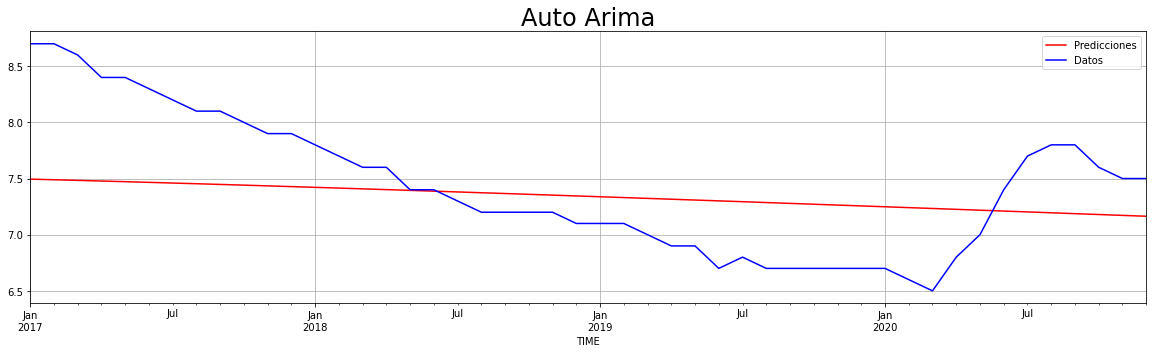

In [86]:
pred2.plot(figsize = (20,5), color = "red")
df_test.Value.plot(figsize = (20,5),color = "blue")
plt.title("Auto Arima", size = 24)
plt.legend(['Predicciones','Datos'])
plt.grid()
plt.show()

### Comparación numérica

In [87]:
labels = ['AU_A(1)','AU_AR(2)']
preds = [pred1, pred2] 

for i in range(2):
    error = np.sqrt(mean_squared_error(df_test, preds[i]))
    print(f'{labels[i]} Error: {error}')

AU_A(1) Error: 1.034023766280756
AU_AR(2) Error: 0.5567826532743476


### Predicciones

In [88]:
fcast,error = model_auto2.predict(n_periods = 12,  return_conf_int= True)

In [89]:
error

array([[7.31032855, 7.67897074],
       [7.19529947, 7.78302383],
       [7.08377012, 7.88331656],
       [6.97132392, 7.98427941],
       [6.85699779, 8.08688859],
       [6.7406898 , 8.1912585 ],
       [6.62257135, 8.2972295 ],
       [6.50290099, 8.40455422],
       [6.38195548, 8.51296645],
       [6.26000254, 8.62220848],
       [6.13729022, 8.7320417 ],
       [6.01404351, 8.84225009]])

In [90]:
fcast

array([7.49464965, 7.48916165, 7.48354334, 7.47780166, 7.47194319,
       7.46597415, 7.45990043, 7.45372761, 7.44746097, 7.44110551,
       7.43466596, 7.4281468 ])

In [91]:
fecha_fut=pd.date_range(start="2021-01-01",freq='MS',periods=12)
fecha_fut

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [92]:
df_fcast = pd.DataFrame(fcast)
error = pd.DataFrame(error)

In [93]:
df_fcast.index= fecha_fut
df_fcast.columns=['fcast']
df_fcast.head()

,fcast
2021-01-01,7.494650
2021-02-01,7.489162
2021-03-01,7.483543
2021-04-01,7.477802
2021-05-01,7.471943


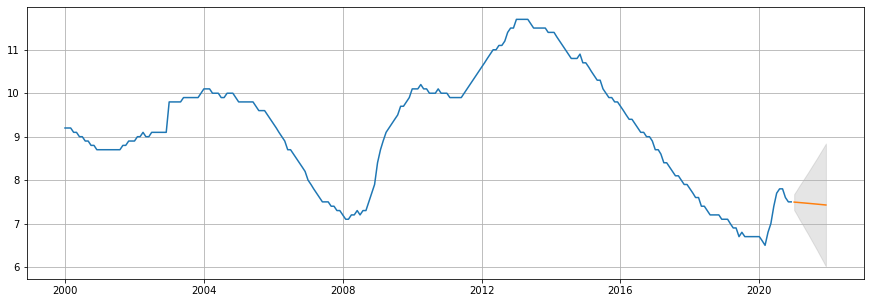

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df3.Value)
ax.plot(df_fcast)
ax.fill_between(df_fcast.index, 
                error[0], 
                error[1], color='grey', alpha=0.2)
plt.grid()
plt.show()